### Explore Kiba dataset

In [50]:
#!pip install pyTDC
#!pip install rdkit-pypi==2021.3.1.2
#!pip install networkx

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [115]:
import pandas as pd
from tdc.multi_pred import DTI
import numpy as np
from matplotlib import pyplot as plt
import generate_molecule_features as gmf

In [119]:
%load_ext autoreload
%autoreload 2

In [52]:
# this split contains train, test and valid
# split is a dict
data = DTI(name = 'Davis')
split = data.get_split()

Downloading...
100%|██████████| 21.4M/21.4M [00:01<00:00, 21.1MiB/s]
Loading...
Done!


In [27]:
split.get("train").head()

,Drug_ID,Drug,Target_ID,Target,Y
0,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,O14920,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,11.1
1,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P04626,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,11.1
2,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P06239,MGCGCSSHPEDDWMENIDVCENCHYPIVPLDGKGTLLIRNGSEVRD...,11.1
3,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P15056,MAALSGGGGGGAEPGQALFNGDMEPEAGAGAGAAASSAADPAIPEE...,11.1
4,CHEMBL1087421,COc1cc2c(cc1Cl)C(c1ccc(Cl)c(Cl)c1)=NCC2,P24941,MENFQKVEKIGEGTYGVVYKARNKLTGEVVALKKIRLDTETEGVPS...,11.1


In [43]:
len(np.intersect1d(split.get("train").Target_ID.tolist(), split.get("valid").Target_ID.tolist()))
len(np.intersect1d(split.get("train").Target_ID.tolist(), split.get("valid").Target_ID.tolist()))
split.get("valid")["Drug_ID"].nunique(), split.get("valid")["Target_ID"].nunique()

226

In [96]:
smile_example = split.get("train")["Drug"][1]
smile_example

'Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12'

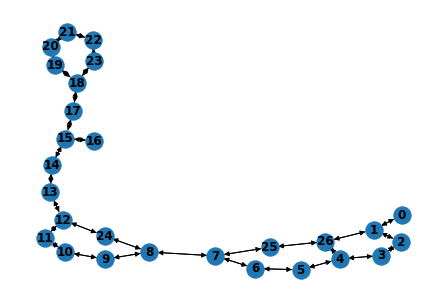

In [136]:
smile_graph_example = gmf.smile_to_graph(smile_example, show=True)

In [137]:
len(smile_graph_example)

3

In [138]:
# the first atomo
smile_graph_example[1][0]

array([0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.25, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  ])

In [139]:
smile_graph_example[2]


[[0, 1],
 [1, 0],
 [1, 2],
 [1, 26],
 [2, 1],
 [2, 3],
 [3, 2],
 [3, 4],
 [4, 3],
 [4, 5],
 [4, 26],
 [5, 4],
 [5, 6],
 [6, 5],
 [6, 7],
 [7, 6],
 [7, 8],
 [7, 25],
 [8, 7],
 [8, 9],
 [8, 24],
 [9, 8],
 [9, 10],
 [10, 9],
 [10, 11],
 [11, 10],
 [11, 12],
 [12, 11],
 [12, 13],
 [12, 24],
 [13, 12],
 [13, 14],
 [14, 13],
 [14, 15],
 [15, 14],
 [15, 16],
 [15, 17],
 [16, 15],
 [17, 15],
 [17, 18],
 [18, 17],
 [18, 19],
 [18, 23],
 [19, 18],
 [19, 20],
 [20, 19],
 [20, 21],
 [21, 20],
 [21, 22],
 [22, 21],
 [22, 23],
 [23, 22],
 [23, 18],
 [24, 12],
 [24, 8],
 [25, 7],
 [25, 26],
 [26, 25],
 [26, 1],
 [26, 4]]

[[0, 1],
 [1, 2],
 [2, 3],
 [3, 4],
 [4, 5],
 [5, 6],
 [6, 7],
 [7, 8],
 [8, 9],
 [9, 10],
 [10, 11],
 [11, 12],
 [12, 13],
 [13, 14],
 [14, 15],
 [15, 16],
 [15, 17],
 [17, 18],
 [18, 19],
 [19, 20],
 [20, 21],
 [21, 22],
 [22, 23],
 [12, 24],
 [7, 25],
 [25, 26],
 [26, 1],
 [26, 4],
 [24, 8],
 [23, 18]]

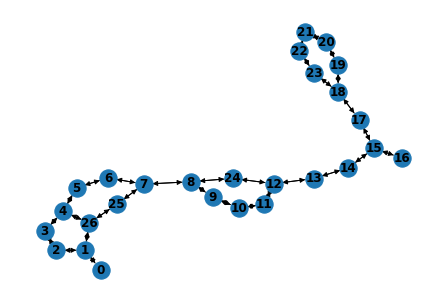